# K-MEAN CLUSTERING

 **KONSEP LANGKAH-LANGKAH K-MEANS CLUSTERING
Tentukan jumlah cluster k**



1.   Tentukan jumlah cluster k

  *   Misalnya, k = 2 jika ingin membagi data menjadi dua kelompok.
  *   Bisa ditentukan secara manual, atau dicari optimalnya dengan elbow method atau silhouette score.
2.   Inisialisasi centroid awal
  *   Pilih k titik awal (bisa dipilih acak, atau ditentukan sendiri)
  *   Bisa ditentukan secara manual, atau dicari optimalnya dengan elbow method atau silhouette score.
3. Hitung jarak dari setiap titik ke setiap centroid
  *   Biasanya digunakan jarak Euclidean.
4. Kelompokkan titik ke centroid terdekat
  *   Setiap data akan diberi label sesuai cluster terdekat.
5. Hitung ulang centroid (rata-rata baru dari tiap cluster)
  *   Ambil rata-rata dari semua titik dalam satu cluster untuk dapatkan centroid baru.
6. Cek konvergensi
  *   Jika label cluster tidak berubah atau centroid tidak berubah secara signifikan, maka proses berhenti.
  *   Jika belum, kembali ke langkah 3.




7. Evaluasi hasil Clustering

  evaluasi bisa dilakukan dengan :
  1. Inertia (Total Within-Cluster Sum of Squares) : jumlah total dari kuadrat jarak setiap titik data ke centroid cluster-nya. Metrik ini menunjukkan seberapa dekat anggota cluster terhadap pusat cluster-nya.
    *    Tapi inertia selalu menurun jika k bertambah, jadi tidak cukup sendiri untuk menentukan k terbaik.
    *  Nilai lebih kecil = lebih baik, artinya data lebih dekat ke centroid-nya.
    
  Berikut adalah rumus menghitung Inertia
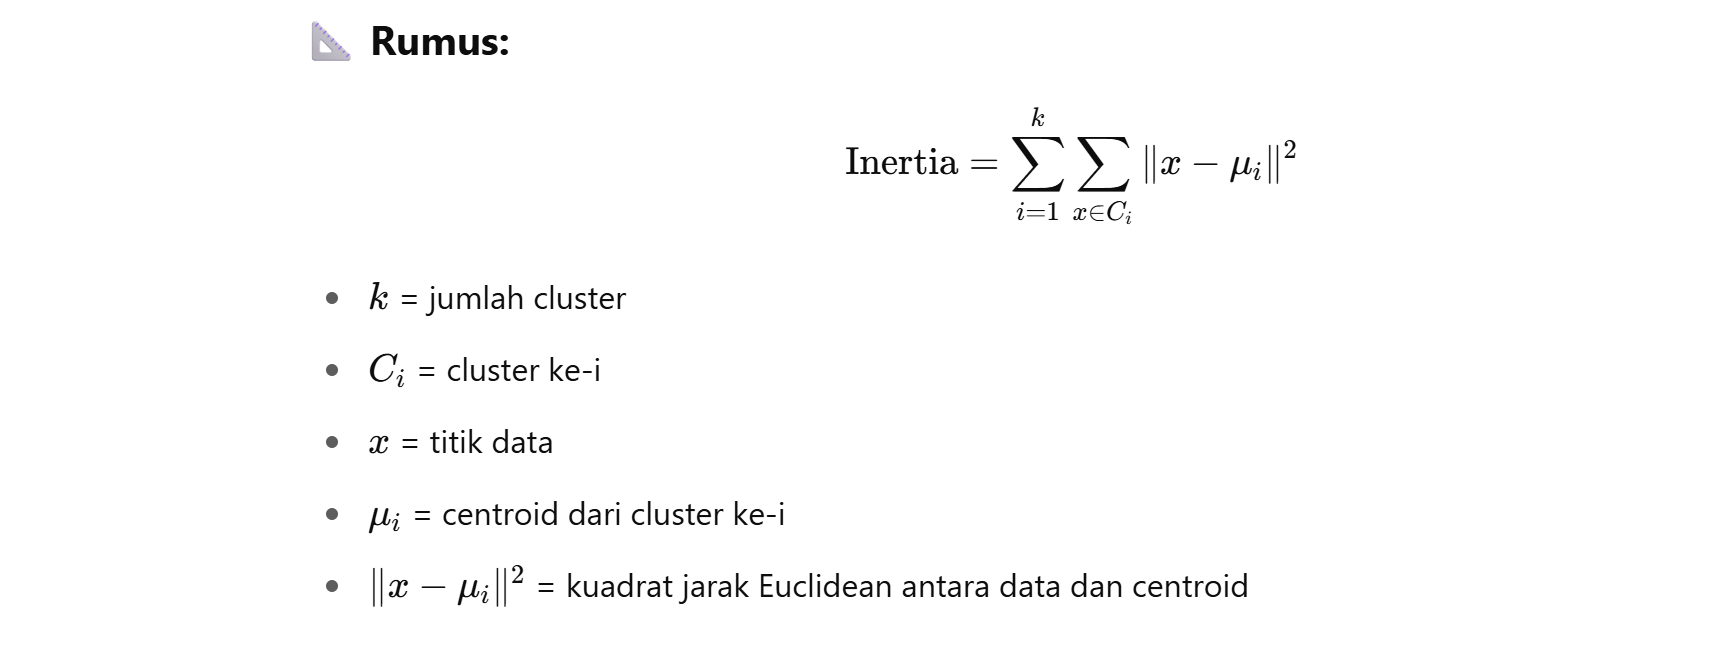

  2. Silhouette Score : Silhouette score mengukur seberapa mirip suatu data dengan cluster-nya sendiri dibanding cluster lain. Nilainya antara -1 sampai 1.
      *   ≈ 1 : Data sangat cocok dengan cluster-nya dan jauh dari cluster lain
      *   ≈ 0 : Data berada di batas antara dua cluster
      *   < 0 : Data mungkin salah tempat (lebih cocok di cluster lain)    

  Berikut rumus menghitung nilai Silhouette
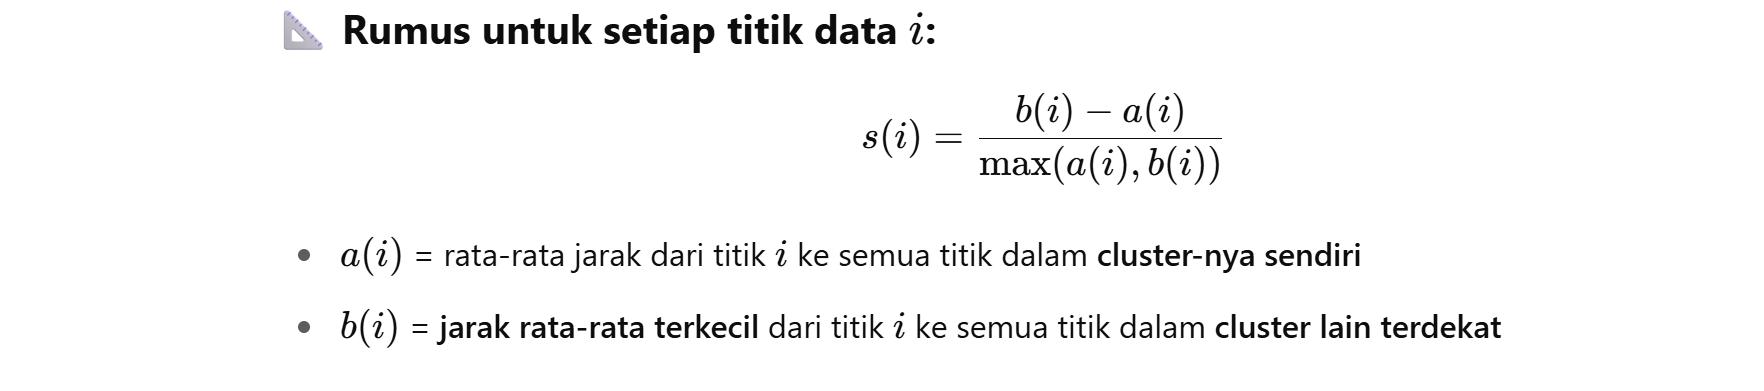



## Contoh Perhitungan Manual

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# 1. Load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# 2. Standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 3. Pilih dua centroid awal (misalnya dari data ke-15 dan ke-20)
centroid_1 = X_scaled[12]  # Index 14 (baris ke-15)
centroid_2 = X_scaled[65]  # Index 19 (baris ke-20)

# 4. Fungsi untuk menghitung jarak Euclidean
def euclidean_distance(point, centroid):
    return np.sqrt(np.sum((point - centroid) ** 2))

# Hitung jarak tiap titik ke centroid
df['Distance_to_Centroid_1'] = [euclidean_distance(x, centroid_1) for x in X_scaled]
df['Distance_to_Centroid_2'] = [euclidean_distance(x, centroid_2) for x in X_scaled]

# ✅ Tentukan cluster berdasarkan jarak terdekat
df['Jarak_Terdekat'] = np.minimum(df['Distance_to_Centroid_1'], df['Distance_to_Centroid_2'])
df['Cluster_Diikuti'] = np.where(
    df['Distance_to_Centroid_1'] <= df['Distance_to_Centroid_2'], 'K1', 'K2'
)

# 7. Tampilkan semua data dalam satu tabel (fitur + hasil jarak + cluster)
print("\nHasil Iterasi ke-1")
print(df.to_string(index=True))


ModuleNotFoundError: No module named 'numpy'

# Implementasi K-Means dengan Sklearn

## Dengan K=2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

# Load iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Tambahkan label asli (Target)
df['Target'] = iris.target

# Normalisasi data
scaler = StandardScaler()
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
df[features] = scaler.fit_transform(df[features])

# Tentukan centroid awal manual (misal indeks 0 dan 50 untuk 2 cluster)
centroid_indices = [0, 50]
centroids = df.loc[centroid_indices, features].values

print("\nCentroid Awal:")
for i, idx in enumerate(centroid_indices, start=1):
    print(f"Centroid {i} (data ke-{idx}): {centroids[i-1]}")

max_iter = 100
tolerance = 1e-6

for iteration in range(1, max_iter + 1):
    distances = cdist(df[features].values, centroids, metric='euclidean')
    df['Cluster_Diikuti'] = np.argmin(distances, axis=1)
    new_centroids = np.array([df.loc[df['Cluster_Diikuti'] == k, features].mean().values for k in range(len(centroids))])
    centroid_shift = np.linalg.norm(new_centroids - centroids)
    print(f"Iterasi ke-{iteration}: Perubahan centroid = {centroid_shift:.8f}")
    centroids = new_centroids
    if centroid_shift < tolerance:
        print("Centroid sudah konvergen.")
        break

print("\nCentroid Akhir:")
for i, centroid in enumerate(centroids, start=1):
    print(f"Centroid {i}: {centroid}")

# Mapping cluster ke label asli berdasarkan mayoritas label dalam cluster
mapped_labels = {}
for cluster_label, group in df.groupby('Cluster_Diikuti'):
    most_common_label = group['Target'].mode()[0]
    mapped_labels[cluster_label] = most_common_label

# Buat kolom PredictedLabel hasil mapping
df['PredictedLabel'] = df['Cluster_Diikuti'].map(mapped_labels)

# Cek benar atau salah
df['IsCorrect'] = (df['PredictedLabel'] == df['Target'])

# Tampilkan jumlah benar dan salah tiap cluster
print("\nJumlah Benar dan Salah Tiap Cluster:")
for cluster_label, group in df.groupby('Cluster_Diikuti'):
    benar = group['IsCorrect'].sum()
    salah = len(group) - benar
    print(f"Cluster {cluster_label}: Total={len(group)}, Benar={benar}, Salah={salah}")

# Hitung dan tampilkan inertia (jumlah kuadrat jarak data ke centroidnya)
inertia = 0
for i in range(len(centroids)):
    cluster_points = df[df['Cluster_Diikuti'] == i][features].values
    centroid = centroids[i]
    inertia += np.sum(np.linalg.norm(cluster_points - centroid, axis=1)**2)
print(f"\nInertia: {inertia:.4f}")

# Hitung silhouette score
sil_score = silhouette_score(df[features], df['Cluster_Diikuti'])
print(f"Silhouette Score: {sil_score:.4f}")

# Tampilkan akurasi keseluruhan
total_benar = df['IsCorrect'].sum()
total_data = len(df)
akurasi = total_benar / total_data * 100
print(f"\nAkurasi keseluruhan: {akurasi:.2f}%")

# Tampilkan semua data lengkap dengan nomor urut
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df_reset = df.reset_index(drop=True)
df_reset.index += 1  # nomor urut mulai dari 1

print("\nData Lengkap dengan Nomor Urut:")
print(df_reset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Target', 'Cluster_Diikuti', 'PredictedLabel', 'IsCorrect']].to_string(index=True))



Centroid Awal:
Centroid 1 (data ke-0): [-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
Centroid 2 (data ke-50): [1.40150837 0.32841405 0.53540856 0.26414192]
Iterasi ke-1: Perubahan centroid = 1.23954815
Iterasi ke-2: Perubahan centroid = 0.17163906
Iterasi ke-3: Perubahan centroid = 0.00000000
Centroid sudah konvergen.

Centroid Akhir:
Centroid 1: [-1.01457897  0.85326268 -1.30498732 -1.25489349]
Centroid 2: [ 0.50728948 -0.42663134  0.65249366  0.62744675]

Jumlah Benar dan Salah Tiap Cluster:
Cluster 0: Total=50, Benar=50, Salah=0
Cluster 1: Total=100, Benar=50, Salah=50

Inertia: 222.3617
Silhouette Score: 0.5818

Akurasi keseluruhan: 66.67%

Data Lengkap dengan Nomor Urut:
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Target  Cluster_Diikuti  PredictedLabel  IsCorrect
1     -0.900681       1.019004     -1.340227      -1.315444       0           0                0           True  
2     -1.143017      -0.131979     -1.340227      -1.315444       0           0   

## Dengan K=3

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

# Load iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Tambahkan label asli (Target)
df['Target'] = iris.target

# Normalisasi data
scaler = StandardScaler()
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
df[features] = scaler.fit_transform(df[features])

# Tentukan centroid awal manual (misal indeks 0, 50, dan 100 untuk 3 cluster)
centroid_indices = [0, 50, 100]
centroids = df.loc[centroid_indices, features].values

print("\nCentroid Awal:")
for i, idx in enumerate(centroid_indices, start=1):
    print(f"Centroid {i} (data ke-{idx}): {centroids[i-1]}")

max_iter = 100
tolerance = 1e-6

for iteration in range(1, max_iter + 1):
    distances = cdist(df[features].values, centroids, metric='euclidean')
    df['Cluster_Diikuti'] = np.argmin(distances, axis=1)
    new_centroids = np.array([df.loc[df['Cluster_Diikuti'] == k, features].mean().values for k in range(len(centroids))])
    centroid_shift = np.linalg.norm(new_centroids - centroids)
    print(f"Iterasi ke-{iteration}: Perubahan centroid = {centroid_shift:.8f}")
    centroids = new_centroids
    if centroid_shift < tolerance:
        print("Centroid sudah konvergen.")
        break

print("\nCentroid Akhir:")
for i, centroid in enumerate(centroids, start=1):
    print(f"Centroid {i}: {centroid}")

# Mapping cluster ke label asli berdasarkan mayoritas label dalam cluster
mapped_labels = {}
for cluster_label, group in df.groupby('Cluster_Diikuti'):
    most_common_label = group['Target'].mode()[0]
    mapped_labels[cluster_label] = most_common_label

# Buat kolom PredictedLabel hasil mapping
df['PredictedLabel'] = df['Cluster_Diikuti'].map(mapped_labels)

# Cek benar atau salah
df['IsCorrect'] = (df['PredictedLabel'] == df['Target'])

# Tampilkan jumlah benar dan salah tiap cluster
print("\nJumlah Benar dan Salah Tiap Cluster:")
for cluster_label, group in df.groupby('Cluster_Diikuti'):
    benar = group['IsCorrect'].sum()
    salah = len(group) - benar
    print(f"Cluster {cluster_label}: Total={len(group)}, Benar={benar}, Salah={salah}")

# Hitung inertia (jumlah kuadrat jarak ke centroid)
inertia = 0
for i in range(len(centroids)):
    cluster_points = df[df['Cluster_Diikuti'] == i][features].values
    centroid = centroids[i]
    inertia += np.sum(np.linalg.norm(cluster_points - centroid, axis=1)**2)
print(f"\nInertia: {inertia:.4f}")

# Hitung silhouette score
sil_score = silhouette_score(df[features], df['Cluster_Diikuti'])
print(f"Silhouette Score: {sil_score:.4f}")

# Tampilkan akurasi keseluruhan
total_benar = df['IsCorrect'].sum()
total_data = len(df)
akurasi = total_benar / total_data * 100
print(f"\nAkurasi keseluruhan: {akurasi:.2f}%")

# Tampilkan semua data lengkap dengan nomor urut
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df_reset = df.reset_index(drop=True)
df_reset.index += 1  # nomor urut mulai dari 1

print("\nData Lengkap dengan Nomor Urut:")
print(df_reset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Target', 'Cluster_Diikuti', 'PredictedLabel', 'IsCorrect']].to_string(index=True))



Centroid Awal:
Centroid 1 (data ke-0): [-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
Centroid 2 (data ke-50): [1.40150837 0.32841405 0.53540856 0.26414192]
Centroid 3 (data ke-100): [0.55333328 0.55861082 1.27429511 1.71209594]
Iterasi ke-1: Perubahan centroid = 1.52358636
Iterasi ke-2: Perubahan centroid = 0.78113007
Iterasi ke-3: Perubahan centroid = 0.18700578
Iterasi ke-4: Perubahan centroid = 0.06188676
Iterasi ke-5: Perubahan centroid = 0.03412112
Iterasi ke-6: Perubahan centroid = 0.00000000
Centroid sudah konvergen.

Centroid Akhir:
Centroid 1: [-1.01457897  0.85326268 -1.30498732 -1.25489349]
Centroid 2: [-0.01139555 -0.87600831  0.37707573  0.31115341]
Centroid 3: [1.16743407 0.14530299 1.00302557 1.0300019 ]

Jumlah Benar dan Salah Tiap Cluster:
Cluster 0: Total=50, Benar=50, Salah=0
Cluster 1: Total=56, Benar=39, Salah=17
Cluster 2: Total=44, Benar=33, Salah=11

Inertia: 140.0328
Silhouette Score: 0.4630

Akurasi keseluruhan: 81.33%

Data Lengkap dengan Nomor Urut:
   

## Dengan K=4

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

# Load iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Tambahkan label asli (Target)
df['Target'] = iris.target

# Normalisasi data
scaler = StandardScaler()
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
df[features] = scaler.fit_transform(df[features])

# Tentukan centroid awal manual (misal indeks 0, 30, 80, 120 untuk 4 cluster)
centroid_indices = [0, 30, 80, 120]
centroids = df.loc[centroid_indices, features].values

print("\nCentroid Awal:")
for i, idx in enumerate(centroid_indices, start=1):
    print(f"Centroid {i} (data ke-{idx}): {centroids[i-1]}")

max_iter = 100
tolerance = 1e-6

for iteration in range(1, max_iter + 1):
    distances = cdist(df[features].values, centroids, metric='euclidean')
    df['Cluster_Diikuti'] = np.argmin(distances, axis=1)
    new_centroids = np.array([df.loc[df['Cluster_Diikuti'] == k, features].mean().values for k in range(len(centroids))])
    centroid_shift = np.linalg.norm(new_centroids - centroids)
    print(f"Iterasi ke-{iteration}: Perubahan centroid = {centroid_shift:.8f}")
    centroids = new_centroids
    if centroid_shift < tolerance:
        print("Centroid sudah konvergen.")
        break

print("\nCentroid Akhir:")
for i, centroid in enumerate(centroids, start=1):
    print(f"Centroid {i}: {centroid}")

# Mapping cluster ke label asli berdasarkan mayoritas label dalam cluster
mapped_labels = {}
for cluster_label, group in df.groupby('Cluster_Diikuti'):
    most_common_label = group['Target'].mode()[0]
    mapped_labels[cluster_label] = most_common_label

# Buat kolom PredictedLabel hasil mapping
df['PredictedLabel'] = df['Cluster_Diikuti'].map(mapped_labels)

# Cek benar atau salah
df['IsCorrect'] = (df['PredictedLabel'] == df['Target'])

# Tampilkan jumlah benar dan salah tiap cluster
print("\nJumlah Benar dan Salah Tiap Cluster:")
for cluster_label, group in df.groupby('Cluster_Diikuti'):
    benar = group['IsCorrect'].sum()
    salah = len(group) - benar
    print(f"Cluster {cluster_label}: Total={len(group)}, Benar={benar}, Salah={salah}")

# Hitung inertia (jumlah kuadrat jarak ke centroid)
inertia = 0
for i in range(len(centroids)):
    cluster_points = df[df['Cluster_Diikuti'] == i][features].values
    centroid = centroids[i]
    inertia += np.sum(np.linalg.norm(cluster_points - centroid, axis=1)**2)
print(f"\nInertia: {inertia:.4f}")

# Hitung silhouette score
sil_score = silhouette_score(df[features], df['Cluster_Diikuti'])
print(f"Silhouette Score: {sil_score:.4f}")

# Tampilkan akurasi keseluruhan
total_benar = df['IsCorrect'].sum()
total_data = len(df)
akurasi = total_benar / total_data * 100
print(f"\nAkurasi keseluruhan: {akurasi:.2f}%")

# Tampilkan semua data lengkap dengan nomor urut
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df_reset = df.reset_index(drop=True)
df_reset.index += 1  # nomor urut mulai dari 1

print("\nData Lengkap dengan Nomor Urut:")
print(df_reset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Target', 'Cluster_Diikuti', 'PredictedLabel', 'IsCorrect']].to_string(index=True))



Centroid Awal:
Centroid 1 (data ke-0): [-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
Centroid 2 (data ke-30): [-1.26418478  0.09821729 -1.22655167 -1.3154443 ]
Centroid 3 (data ke-80): [-0.41600969 -1.51316008  0.02387172 -0.13075464]
Centroid 4 (data ke-120): [1.2803405  0.32841405 1.10378283 1.44883158]
Iterasi ke-1: Perubahan centroid = 1.07553368
Iterasi ke-2: Perubahan centroid = 0.10746242
Iterasi ke-3: Perubahan centroid = 0.07339724
Iterasi ke-4: Perubahan centroid = 0.08954944
Iterasi ke-5: Perubahan centroid = 0.00000000
Centroid sudah konvergen.

Centroid Akhir:
Centroid 1: [-0.74922133  1.43007001 -1.29759846 -1.22142131]
Centroid 2: [-1.35230687  0.11914427 -1.31439133 -1.29749445]
Centroid 3: [-0.07723421 -0.93062132  0.32313817  0.23727821]
Centroid 4: [1.06889068 0.05759433 0.96893325 1.00231456]

Jumlah Benar dan Salah Tiap Cluster:
Cluster 0: Total=28, Benar=28, Salah=0
Cluster 1: Total=22, Benar=22, Salah=0
Cluster 2: Total=49, Benar=38, Salah=11
Cluster 3: Tota

## Visualisasi

### Visualisasi Menggunakan Scatter Plot


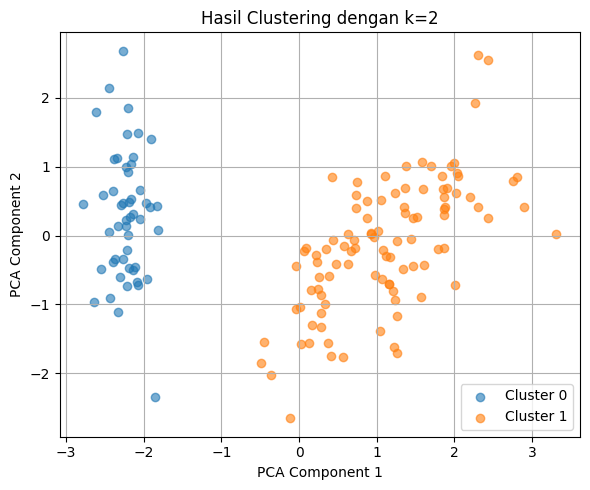

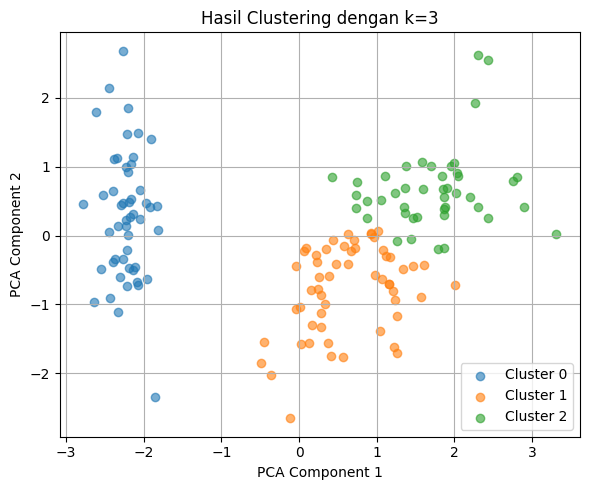

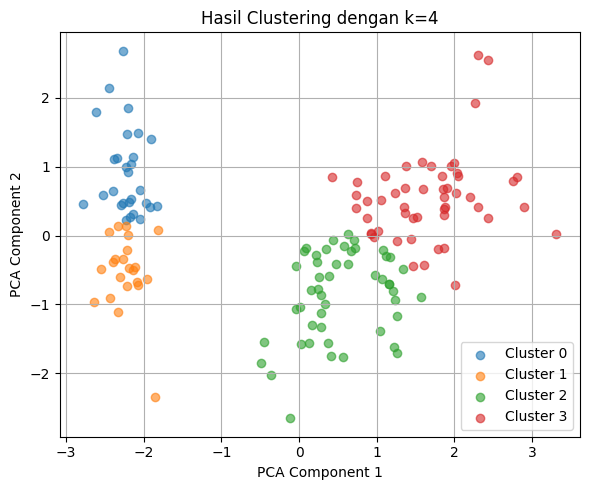

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fungsi visualisasi hasil clustering
def plot_clusters(df, title):
    pca = PCA(n_components=2)
    components = pca.fit_transform(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
    df['PCA1'] = components[:, 0]
    df['PCA2'] = components[:, 1]

    plt.figure(figsize=(6, 5))
    for cluster in sorted(df['Cluster_Diikuti'].unique()):
        cluster_data = df[df['Cluster_Diikuti'] == cluster]
        plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', alpha=0.6)

    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Load dan normalisasi data
iris = load_iris()
df_original = pd.DataFrame(iris.data, columns=iris.feature_names)
df_original.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
df_original['Target'] = iris.target
scaler = StandardScaler()
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
df_original[features] = scaler.fit_transform(df_original[features])

# Daftar konfigurasi k dan indeks centroid awalnya
configs = {
    2: [0, 50],
    3: [0, 50, 100],
    4: [0, 30, 80, 120]
}

# Visualisasi setiap k
for k, indices in configs.items():
    df = df_original.copy()
    centroids = df.loc[indices, features].values

    for iteration in range(100):
        distances = cdist(df[features].values, centroids, metric='euclidean')
        df['Cluster_Diikuti'] = np.argmin(distances, axis=1)
        new_centroids = np.array([df.loc[df['Cluster_Diikuti'] == i, features].mean().values for i in range(len(centroids))])
        if np.linalg.norm(new_centroids - centroids) < 1e-6:
            break
        centroids = new_centroids

    plot_clusters(df, f'Hasil Clustering dengan k={k}')


### Visualisasi Menggunakan Elbow Method
Elbow Method adalah salah satu teknik yang digunakan untuk menentukan jumlah klaster (jumlah k) yang optimal dalam algoritma K-Means Clustering.

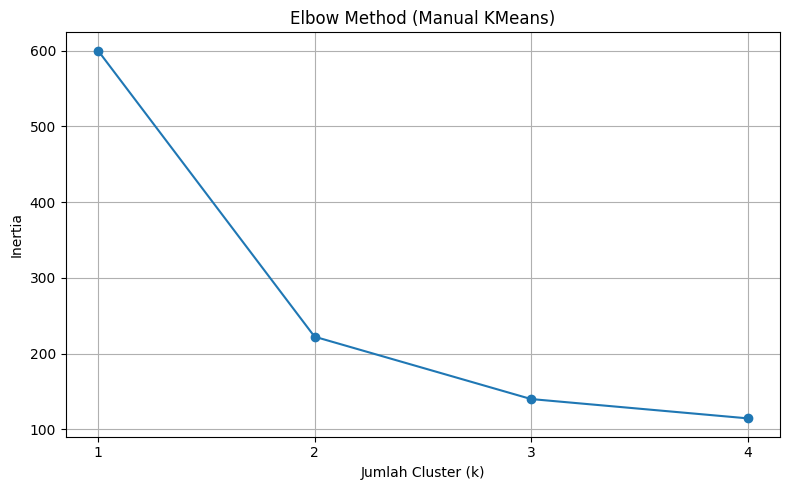

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# Load dan normalisasi data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
df.columns = features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Fungsi KMeans manual dengan centroid acak dan inertia
def manual_kmeans(data, k, max_iter=100, tol=1e-6):
    np.random.seed(42)
    centroid_indices = np.random.choice(len(data), k, replace=False)
    centroids = data[centroid_indices]

    for _ in range(max_iter):
        distances = cdist(data, centroids, 'euclidean')
        cluster_labels = np.argmin(distances, axis=1)

        new_centroids = np.array([data[cluster_labels == i].mean(axis=0) for i in range(k)])
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids

    # Hitung inertia (jumlah kuadrat jarak tiap titik ke centroid-nya)
    inertia = 0
    for i in range(k):
        cluster_points = data[cluster_labels == i]
        centroid = centroids[i]
        inertia += np.sum((np.linalg.norm(cluster_points - centroid, axis=1))**2)

    return inertia

# Hitung inertia untuk k=1 sampai 10
X = df[features].values
inertias = []
ks = range(1, 5)

for k in ks:
    inertia = manual_kmeans(X, k)
    inertias.append(inertia)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(ks, inertias, marker='o')
plt.title('Elbow Method (Manual KMeans)')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.grid(True)
plt.tight_layout()
plt.show()


## Evaluasi Keseluruhan

**Evaluasi K-Means Clustering Berdasarkan Hasil Perhitungan**

Dasar Evaluasi :
1. Inertia: Semakin kecil inertia, semakin baik (cluster lebih kompak).
2. Silhouette Score: semakin mendekati 1, semakin baik kualitas clustering-nya.
---
1. K=2 :
  *   Inertia: 222.3617
  *   Silhouette Score: 0.5818
  *   Akurasi keseluruhan: 66.67%
  *   Distribusi cluster
    *  Cluster 0: Total = 50, Benar = 50 (100%)
    *   Cluster 1: Total = 100, Benar = 50 (50%)

  Penjelasan:
  *   Silhouette Score tertinggi menunjukkan struktur cluster cukup jelas.
  *   Namun, akurasi masih rendah, karena hanya satu cluster (0) yang terkelompok dengan baik, sementara cluster lainnya tercampur.

2. K=3 :
  *   Inertia: 140.0328 (lebih baik dari k=2)
  *   Silhouette Score: 0.4630 (turun dari k=2)
  *  Akurasi: 81.33%
  *   Distribusi cluster
    *  Cluster 0: 50 data, Benar = 50 (100%)
    *  Cluster 1: 56 data, Benar = 39 (69.64%)
    *  Cluster 2: 44 data, Benar = 33 (75%)

  Penjelasan:
  *   Inertia lebih rendah → cluster lebih kompak.menunjukkan struktur cluster cukup jelas.
  *   Akurasi meningkat signifikan.
  *   Silhouette menurun, menunjukkan beberapa cluster mulai beririsan.
  *   Terdapat keseimbangan antara performa pemisahan dan komposisi cluster.

3. K=4 :
  *   Inertia: 114.3541 (paling rendah)
  *   Silhouette Score: 0.3850 (paling rendah)
  *  Akurasi: 84.67%
  *   Distribusi cluster
    *  Cluster 0: Total=28, Benar=28, Salah=0
    *  Cluster 1: Total=22, Benar=22, Salah=0
    *  Cluster 2: Benar = 38 dari 49 (77.55%)
    * Cluster 3: Benar = 39 dari 51 (76.47%)

  Penjelasan:
  *   Akurasi tertinggi, tapi Silhouette Score rendah, menunjukkan overfitting dan pemisahan cluster yang kurang alami.
  *   Penurunan Silhouette Score berarti cluster tidak saling terpisah dengan baik.
  *   Penambahan jumlah cluster meningkatkan akurasi tetapi menurunkan kualitas struktur cluster.


---


**Kesimpulan: Jumlah Cluster (k) Terbaik**

k = 3 adalah pilihan terbaik secara keseluruhan karena:

1.   Memberikan keseimbangan terbaik antara akurasi, struktur cluster, dan kompaknya data (inertia).
2.  Tidak terjadi overfitting seperti pada k=4.
3. Silhouette Score masih berada pada level moderat, menandakan pemisahan cluster masih cukup alami.

---

❓Apakah K-Means Efektif untuk Data Ini?

Jawaban:

✅ Ya, metode K-Means cukup efektif, dengan catatan:

*   K-Means mampu mengelompokkan data dengan akurasi cukup tinggi (hingga 84.67%) tanpa bantuan label asli.
*  Cluster menunjukkan struktur yang cukup jelas terutama saat k=3.
*   Namun, karena K-Means hanya mempertimbangkan jarak (euclidean), efektivitas bisa menurun jika fitur data tidak linear atau tidak terdistribusi secara bulat.
*   Performa juga sangat bergantung pada pemilihan jumlah cluster (k) yang tepat dan normalisasi data sebelumnya.











